In [8]:
# Needed libraries for data analysis
import pandas as pd # For retrieving and manipulating data
from matplotlib import pyplot as plt   # data visualization
import matplotlib.cm as cm
import numpy as np
import seaborn as sb # data visualization

In [2]:
# Access desktop data and convert timestamp to a datetime value
dfDesktop = pd.read_json("dino_monthly_desktop_start201501-end202209.json", convert_dates = False)
dfDesktop['timestamp'] = pd.to_datetime(dfDesktop.timestamp, format="%Y%m%d%H")

# Access mobile data and convert timestamp to a datetime value
dfMobile = pd.read_json('dino_monthly_mobile_start201501-end202209.json')
dfMobile['timestamp'] = pd.to_datetime(dfDesktop.timestamp, format="%Y%m%d%H")

        project        article granularity  timestamp   access agent  views
0  en.wikipedia  Aachenosaurus     monthly 2015-07-01  desktop  user   2671
1  en.wikipedia  Aachenosaurus     monthly 2015-08-01  desktop  user  13113
2  en.wikipedia  Aachenosaurus     monthly 2015-09-01  desktop  user  34235
3  en.wikipedia  Aachenosaurus     monthly 2015-10-01  desktop  user   5361
4  en.wikipedia  Aachenosaurus     monthly 2015-11-01  desktop  user  13502
        project        article granularity  timestamp      access agent  views
0  en.wikipedia  Aachenosaurus     monthly 2015-07-01  mobile-app  user    443
1  en.wikipedia  Aachenosaurus     monthly 2015-08-01  mobile-app  user    412
2  en.wikipedia  Aachenosaurus     monthly 2015-09-01  mobile-app  user    283
3  en.wikipedia  Aachenosaurus     monthly 2015-10-01  mobile-app  user    794
4  en.wikipedia  Aachenosaurus     monthly 2015-11-01  mobile-app  user    311


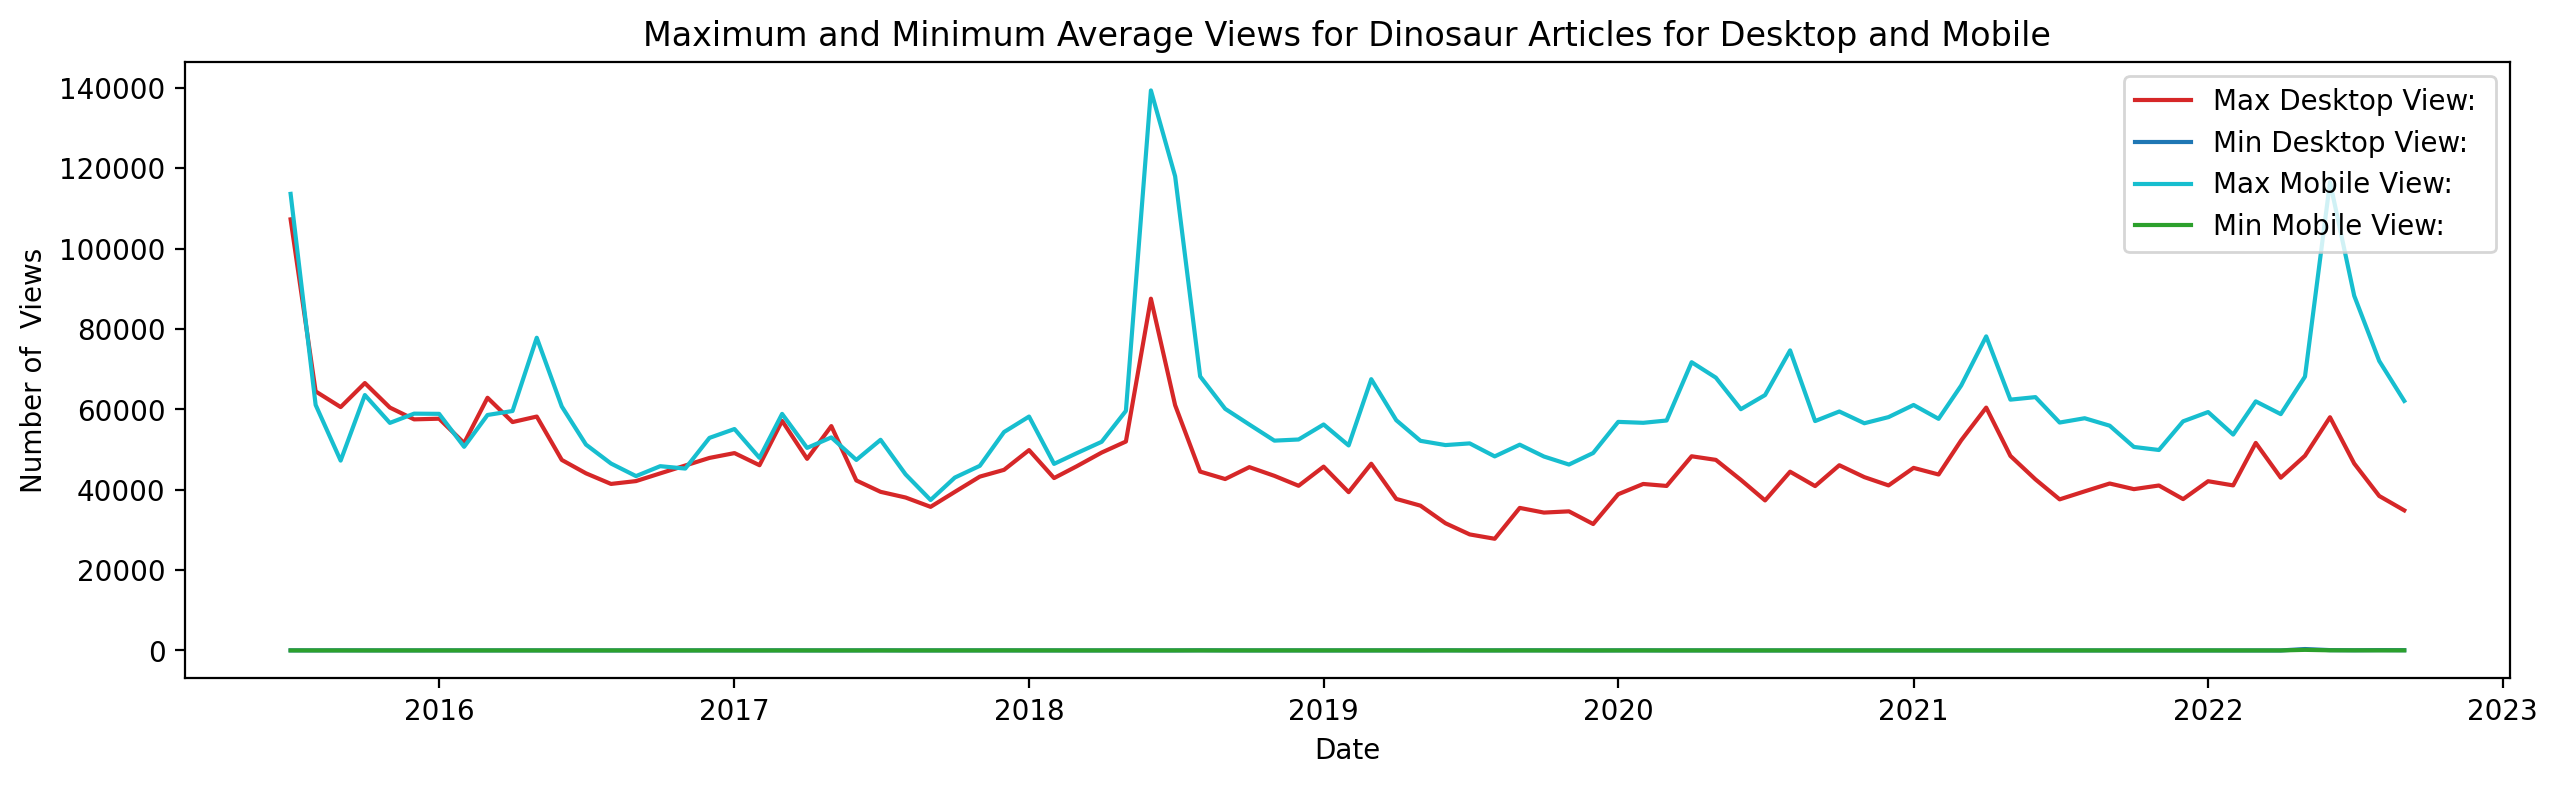

In [6]:
# For each article, get the mean of the views for all months
desktopAve = dfDesktop.groupby('article').agg({'views': ['mean']})
mobileAve = dfMobile.groupby('article').agg({'views': ['mean']})

# Get the maximum and minimum average views for all months for desktop and mobile data
maxDeskAve = dfDesktop[dfDesktop.article == desktopAve['views'].idxmax()[0]]
minDeskAve = dfDesktop[dfDesktop.article == desktopAve['views'].idxmin()[0]]
maxMobileAve = dfMobile[dfMobile.article == mobileAve['views'].idxmax()[0]]
minMobileAve = dfMobile[dfMobile.article == mobileAve['views'].idxmin()[0]]

# Create the plot
title = "Maximum and Minimum Average Views for Dinosaur Articles for Desktop and Mobile"
xlabel = 'Date'
ylabel = 'Number of  Views'
dpi = 200

plt.figure(figsize=(15,4), dpi=dpi)
plt.plot(maxDeskAve['timestamp'], maxDeskAve['views'], color='tab:red', label = "Max Desktop View: ")
plt.plot(minDeskAve['timestamp'], minDeskAve['views'], color='tab:blue', label = "Min Desktop View: ")
plt.plot(maxMobileAve['timestamp'], maxMobileAve['views'], color='tab:cyan', label = "Max Mobile View: ")
plt.plot(minMobileAve['timestamp'], minMobileAve['views'], color='tab:green', label = "Min Mobile View: ")

plt.legend()
plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
plt.show()

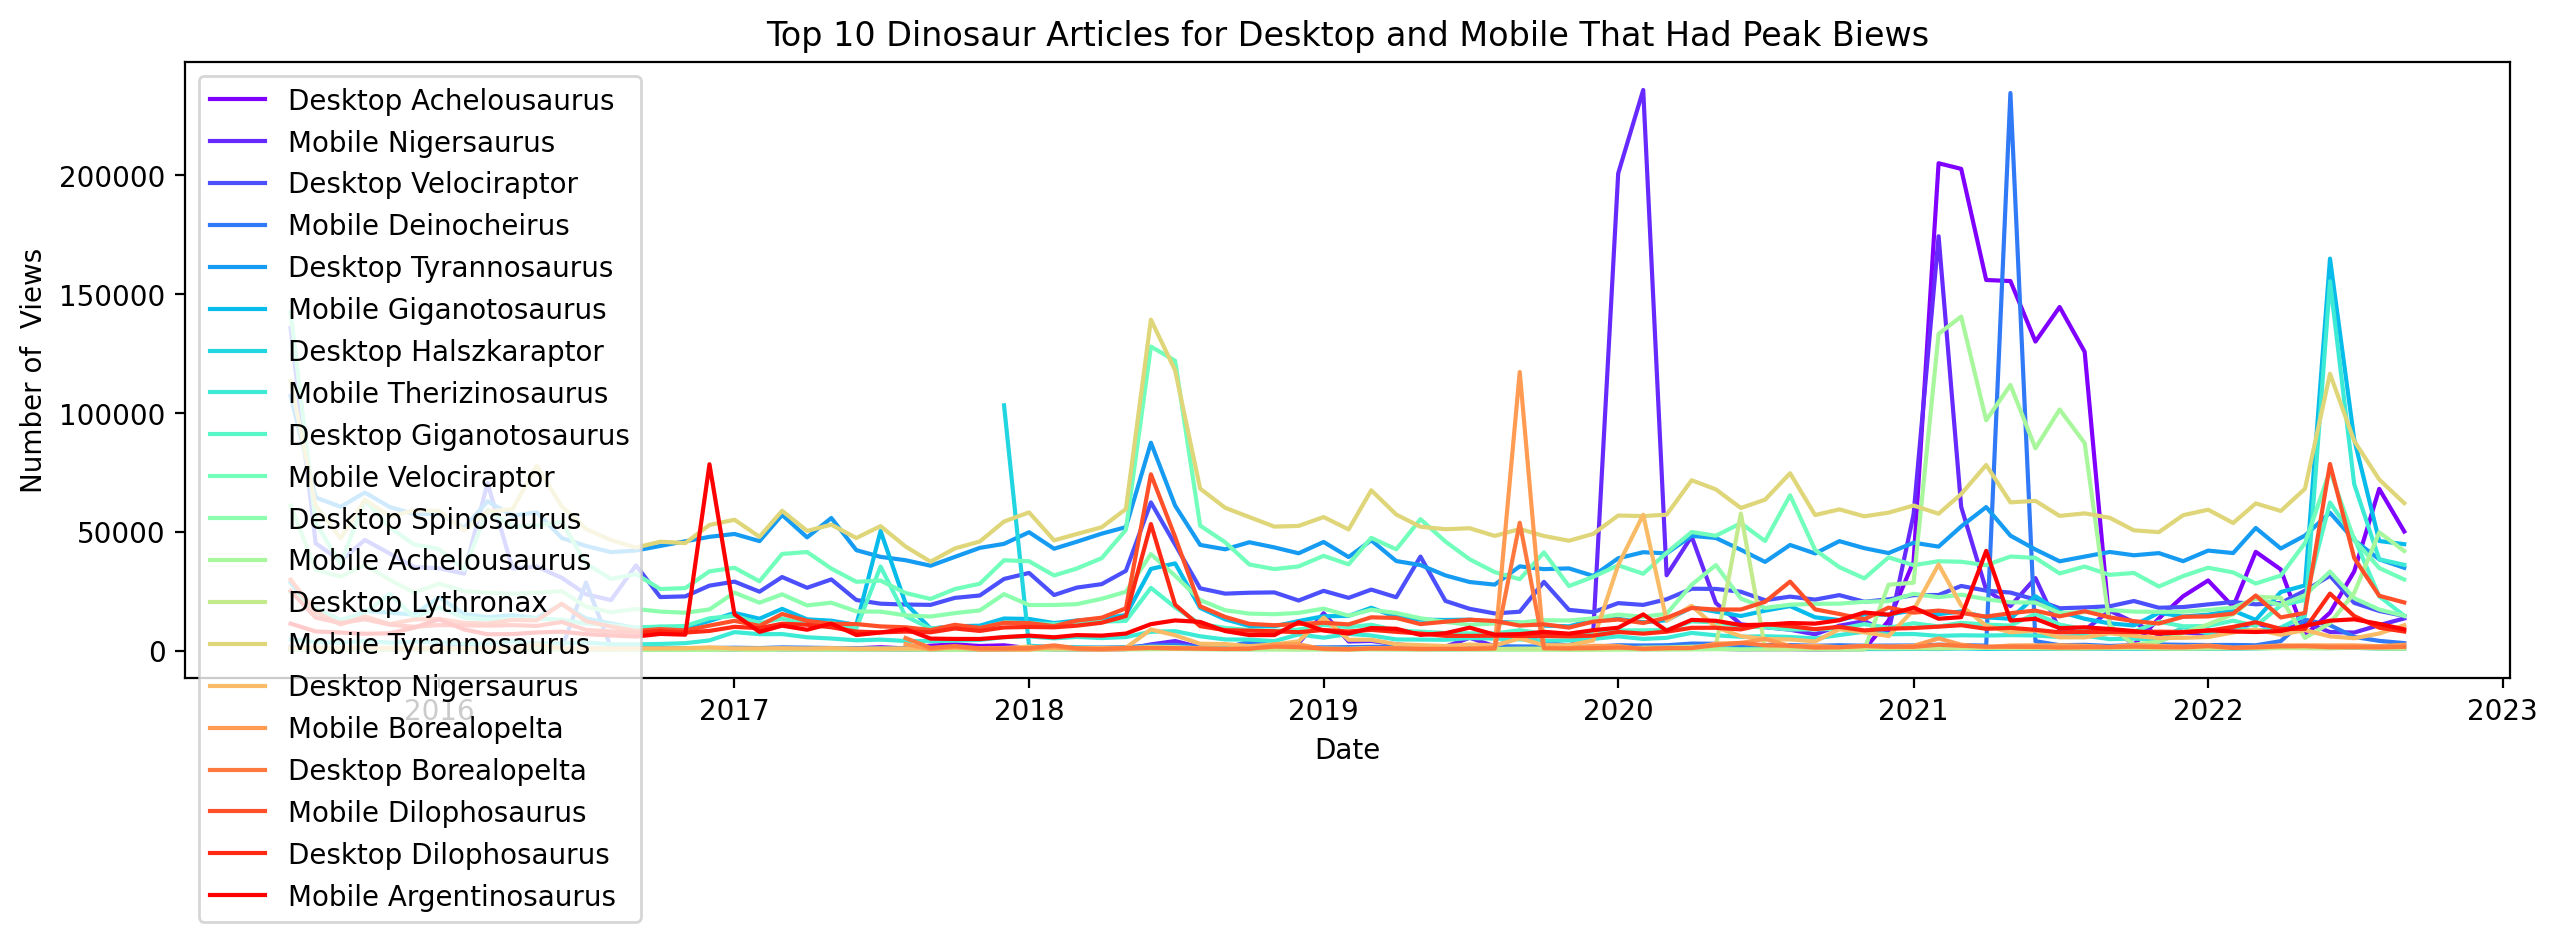

In [13]:
# Sort the articles by the highest peaks
desktopMax = dfDesktop.groupby(['article']).agg({'views': 'max'}).reset_index()
desktopPeak = desktopMax.sort_values(by='views', ascending = False)

mobileMax = dfMobile.groupby(['article']).agg({'views': 'max'}).reset_index()
mobilePeak = mobileMax.sort_values(by='views', ascending = False)

#cmap = sb.blend_palette(["firebrick", "palegreen"], 10)
#sb.set_palette(cmap)
#sb.palplot(sb.color_palette())

#fig, (ax1) = plt.subplots(2,1,figsize=(4,6))

# Create the plot
plt.figure(figsize=(15,4), dpi=dpi)
title = "Top 10 Dinosaur Articles for Desktop and Mobile That Had Peak Views"
colors = iter(cm.rainbow(np.linspace(0, 1, 20)))

# Only plot the top 10 articles with peak views
for i in range(10):
    desktopMax = dfDesktop[dfDesktop.article == desktopPeak.article.iat[i]]
    plt.plot(desktopMax['timestamp'], desktopMax['views'], label = "Desktop "+desktopPeak.article.iat[i], color = next(colors))
    
    mobileMax = dfMobile[dfMobile.article == mobilePeak.article.iat[i]]
    plt.plot(mobileMax['timestamp'], mobileMax['views'], label = "Mobile "+mobilePeak.article.iat[i], color = next(colors))

plt.legend()
plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
plt.show()

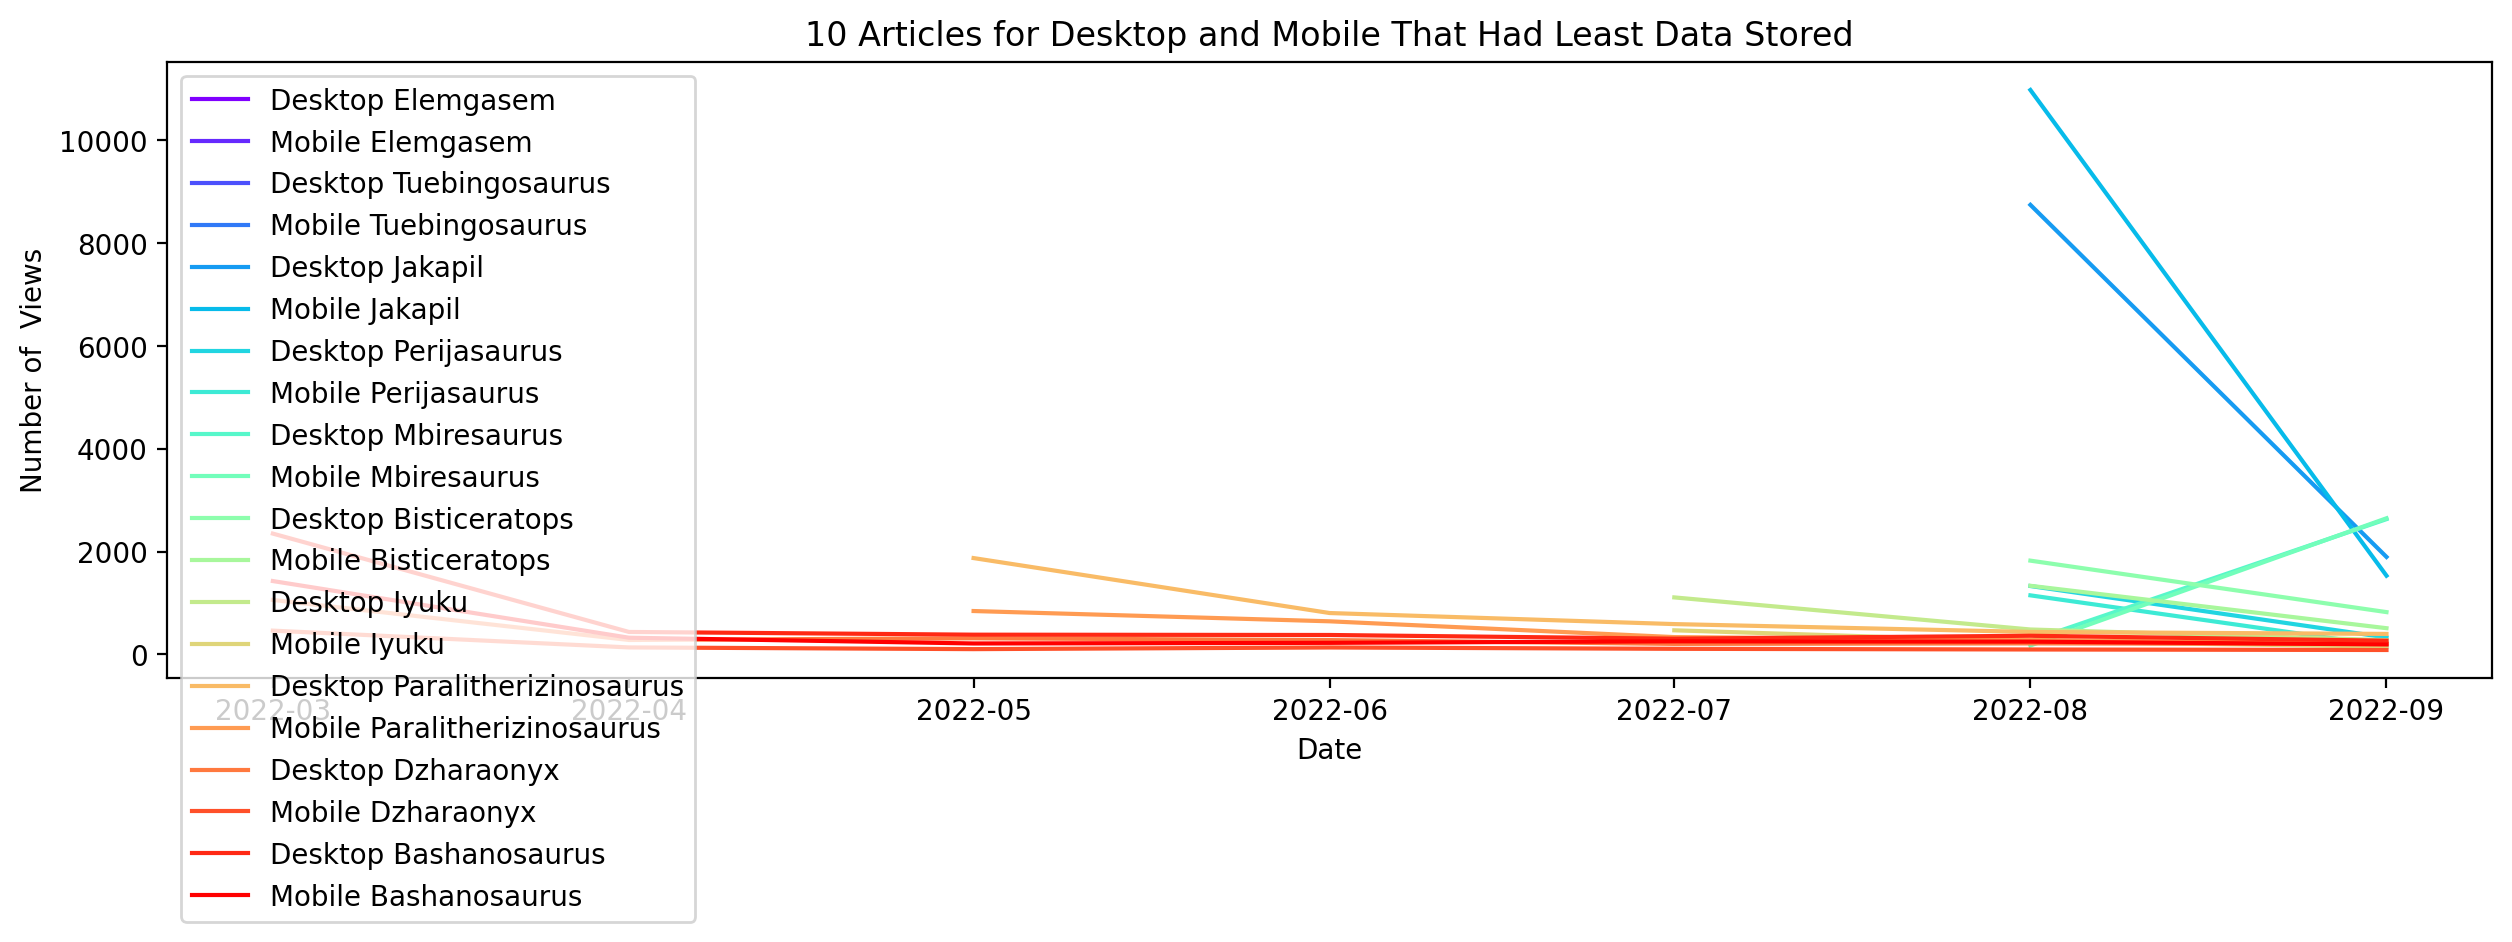

In [16]:
# Sort the desktop articles by those with the least amount of data
desktopTracking = dfDesktop.groupby(['article']).count().reset_index()
desktopTrackingCount = desktopTracking.sort_values(by='views', ascending = True)

# Sort the mobile articles by those with the least amount of data
mobileTracking = dfMobile.groupby(['article']).count().reset_index()
mobileTrackingCount = mobileTracking.sort_values(by='views', ascending = True)

# Create the plot
plt.figure(figsize=(15,4), dpi=dpi)
title = "10 Articles for Desktop and Mobile That Had Least Data Stored"

colors = iter(cm.rainbow(np.linspace(0, 1, 20)))

# Only loop through the 10 Articles that have the least amount of data
for i in range(10):
    currentDesk = dfDesktop[dfDesktop.article == desktopTrackingCount.article.iat[i]]
    plt.plot(currentDesk['timestamp'], currentDesk['views'], label = "Desktop "+desktopTrackingCount.article.iat[i], color = next(colors))
    
    currentMobile = dfMobile[dfMobile.article == mobileTrackingCount.article.iat[i]]
    plt.plot(currentMobile['timestamp'], currentMobile['views'], label = "Mobile "+mobileTrackingCount.article.iat[i], color = next(colors))

plt.legend()
plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
plt.show()